# Supply chain emission analysis

## Introduction
This markdown analyze the global emission and CO2 and other green house gases (GHG) due to the supply chain from various industries.

## Dataset summary 
This dataset source is available here https://www.kaggle.com/datasets/alamshihab075/greenhouse-dataset
It contains the following files:
- `SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv`
- `SupplyChainGHGEmissionFactors_v1.3.0_NAICS_byGHG_USD2022.csv`

The first file contains the figures for all GHGs where as the second contains figures per GHGs.
Both files have the following features:
- *Supply Chain Emission Factors without Margins*
- *Margins of Supply Chain Emission Factors*
- *Supply Chain Emission Factors with Margins*

The following tables shows the columns for both files, followed by the statistical summary of the feature *Supply Chain Emission Factors with Margins*.

The second file contains the emission which are also categorized based on GHG. It contains the following

- Carbon dioxide,
- HFCs and PFCs, unspecified
- Methane
- HFC-23
- HFC-236fa
- Carbon tetrafluoride
- HFC-32
- Hexafluoroethane
- HFC-125
- HFC-134a
- Nitrogen trifluoride
- HFC-143a
- Nitrous oxide
- Perfluorobutane
- Perfluorocyclobutane
- Perfluorohexane
- Perfluoropropane
- Sulfur hexafluoride

In [1]:
!pip install kaleido==0.2.1
#!pip install plotly==6.1.1
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os



# For plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

#To display in nice formatting
from IPython.display import display_html

#To make figures appear in the downloaded 
from IPython.display import Image


pio.renderers.default = "iframe"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.6 MB/s eta 0:00:00


In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

CSV_PATH="../input/greenhouse-dataset"
ALLGHG_DATA_PATH=os.path.join(CSV_PATH,"SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv")
PERGHG_DATA_PATH=os.path.join(CSV_PATH,"SupplyChainGHGEmissionFactors_v1.3.0_NAICS_byGHG_USD2022.csv")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_csv(ALLGHG_DATA_PATH)
display_html(df.head())

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [3]:
df_per_ghg = pd.read_csv(PERGHG_DATA_PATH)
df_per_ghg.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0


## Emission statistics 
The following graphs shows the statistics summary for emission
* The first plot shows the statistics of all GHG combined for the features
  * *Supply Chain Emission Factors without Margins*
  * *Margins of Supply Chain Emission Factors*
* The second plot shows the statistics of each GHG for the feature *Supply Chain Emission Factors without Margins*.

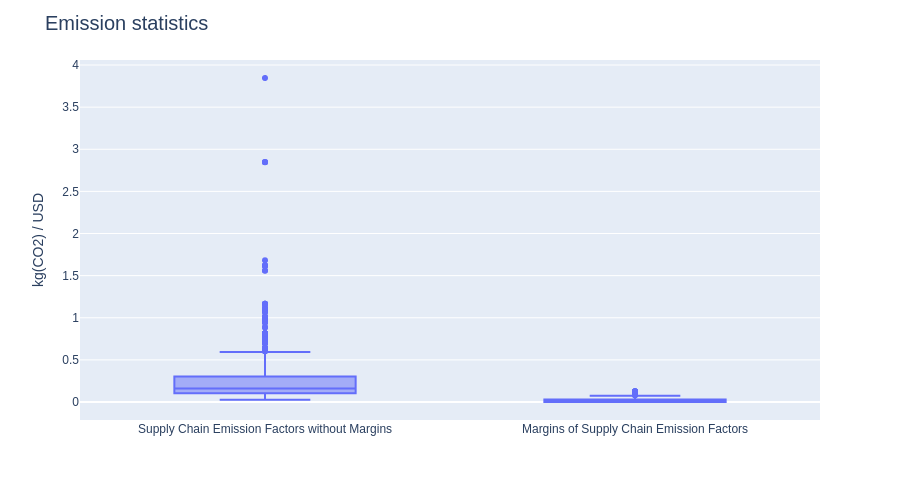

In [4]:
EMISSION_WITH_MARGIN = 'Supply Chain Emission Factors with Margins'
EMISSION_MARGIN = 'Margins of Supply Chain Emission Factors'
EMISSION_WITHOUT_MARGIN = 'Supply Chain Emission Factors without Margins'
NAICS_TITLE = '2017 NAICS Title'
UNIT = 'kg(CO2) / USD'
FIGURE_WIDTH=900

fig = px.box(df, y=[EMISSION_WITHOUT_MARGIN, EMISSION_MARGIN])
fig.update_layout(yaxis_title=UNIT, xaxis_title='', width=FIGURE_WIDTH, 
                  title={'text':f'Emission statistics', 'font':{'size':20}})
# To show plots in the downloaded images
fig.write_image("box_plot_emission.png")
Image(filename="box_plot_emission.png")

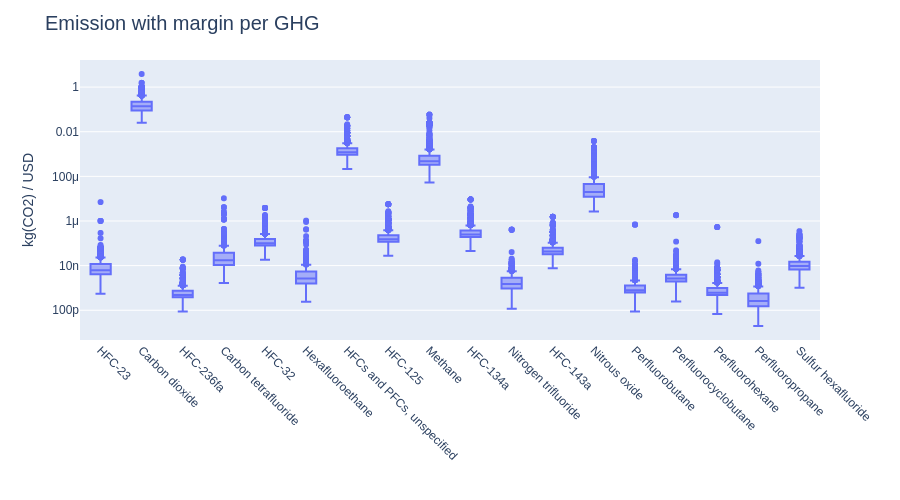

In [5]:
fig = px.box(df_per_ghg, y=EMISSION_WITH_MARGIN, x='GHG', log_y=True)
fig.update_layout(yaxis_title=UNIT, xaxis_title='', width=FIGURE_WIDTH, 
                  title={'text':f'Emission with margin per GHG', 'font':{'size':20}})
fig.update_xaxes(tickangle=45)
# To show plots in the downloaded images
fig.write_image("box_plot_emission_per_ghg.png")
Image(filename="box_plot_emission_per_ghg.png")

The following can be pointed out from the graph
- Carbon dioxide has higher magnitude compared to other gases.
- Range of Methane and HFC and PFCs, unspecified are comparable to carbon dioxide
- Some gases are even 10^9 smaller than Carbon dioxide.

## Exploratory analysis

### Distribution of all GHG emission combined

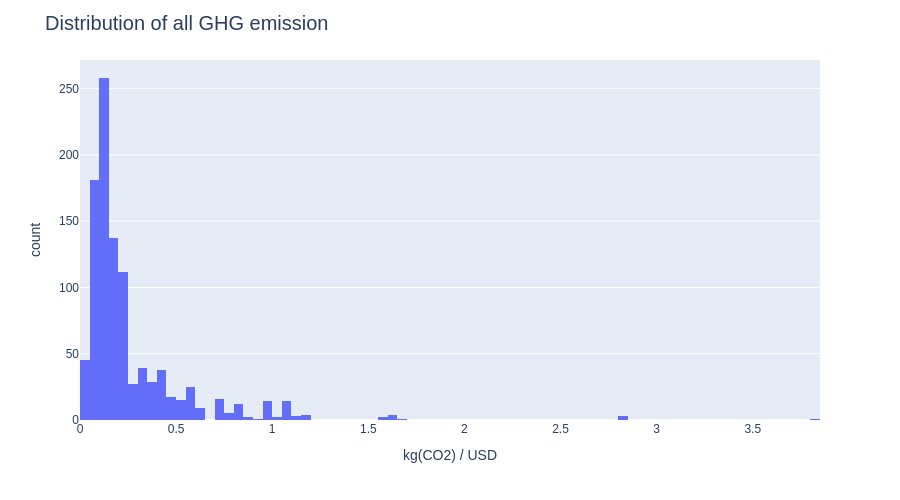

In [6]:
fig = px.histogram(df, x=EMISSION_WITHOUT_MARGIN )
fig.update_layout(xaxis_title=UNIT,  
                  title={'text':f'Distribution of all GHG emission', 'font':{'size':20}})
fig.update_layout(width=FIGURE_WIDTH)
fig.write_image("hostogram_overall_emission.png")
Image(filename="hostogram_overall_emission.png")

### Distribution of individual GHG gas components

It should be noted that the proportion of other GHG gas in comparison to the $CO^2$ is very low. It can also be verified in the next sub-section

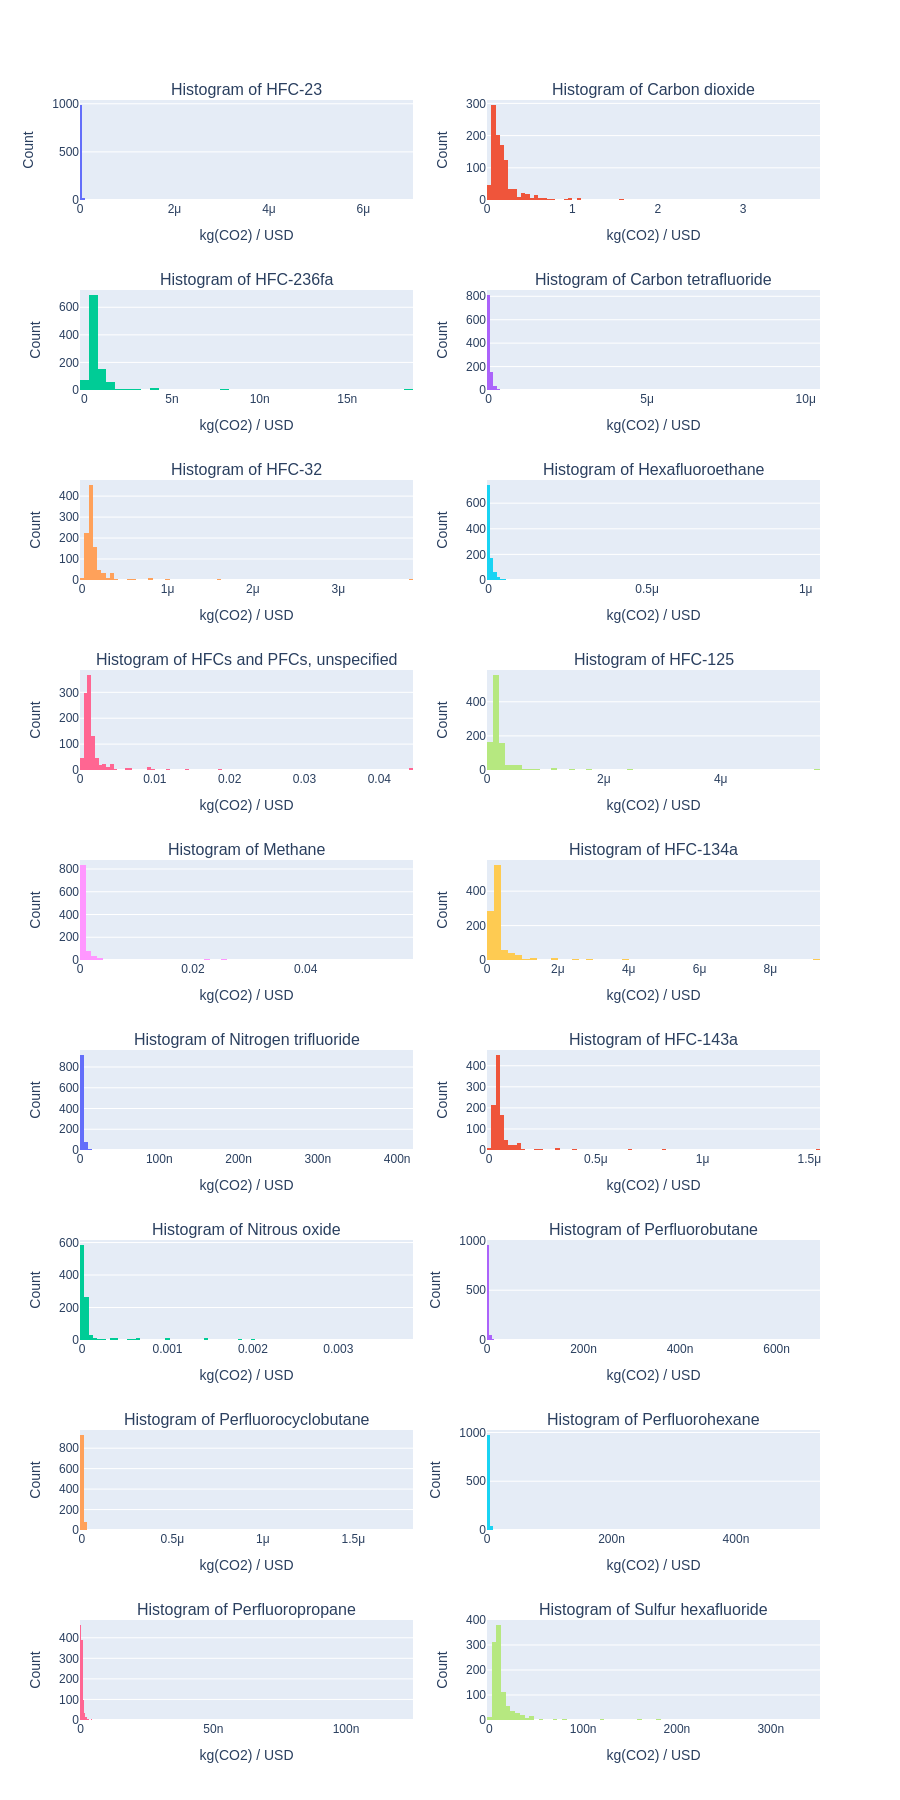

In [7]:
ghg_lists = df_per_ghg['GHG'].unique()

fig = make_subplots(rows=9, cols=2, subplot_titles=[f"Histogram of {col}" for col in ghg_lists])
row = 1
col = 1
for ghg in ghg_lists:
    ghg_data = df_per_ghg[df_per_ghg['GHG'] == ghg][EMISSION_WITH_MARGIN]
    #print(df_per_ghg[df_per_ghg['GHG'] == ghg][EMISSION_WITH_MARGIN])
    fig.add_trace(
    go.Histogram(x=ghg_data, name=ghg),
    row=row, col=col
    )
    fig.update_xaxes(title_text=UNIT, row=row, col=col)
    fig.update_yaxes(title_text="Count", row=row, col=col)
    col += 1
    if col > 2:
        col = 1
        row += 1
fig.update_layout(height=1800, width=FIGURE_WIDTH, title="", showlegend=False)
fig.write_image("hostogram_emission_ghg.png")
Image(filename="hostogram_emission_ghg.png")

### Contribution by GHGs 

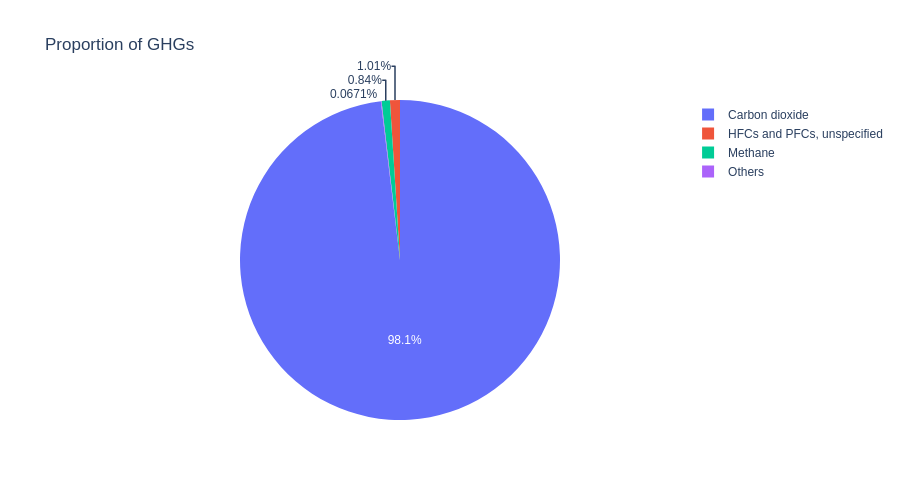

In [8]:
total_emission = df_per_ghg[EMISSION_WITH_MARGIN].sum()
GHG = 'GHG'
emission_per_ghg = df_per_ghg[[GHG,EMISSION_WITH_MARGIN]].groupby(GHG,as_index=False).sum()
emission_per_ghg.head()

filtered_df = emission_per_ghg[emission_per_ghg[EMISSION_WITH_MARGIN]/total_emission > 0.001]
agg_filtered_row = emission_per_ghg[emission_per_ghg[EMISSION_WITH_MARGIN]/total_emission <= 0.001][EMISSION_WITH_MARGIN].sum()

filtered_df = pd.concat([filtered_df, pd.DataFrame([{GHG:'Others', EMISSION_WITH_MARGIN:agg_filtered_row}])], ignore_index=True)
filtered_df.head(10)

fig = px.pie(filtered_df, names=GHG, values=EMISSION_WITH_MARGIN, title='Proportion of GHGs')
fig.update_layout(width=FIGURE_WIDTH)
fig.write_image("pie_chart_emission.png")
Image(filename="pie_chart_emission.png")


The following conclusion can be made from the chart
- The biggest contributers for GHG are Carbon dioxide, HFCs and PFCs, and Methane
- Others includes the following:
    - HFC-23
    - HFC-236fa
    - Carbon tetrafluoride
    - HFC-32
    - Hexafluoroethane
    - HFC-125
    - HFC-134a
    - Nitrogen trifluoride
    - HFC-143a
    - Nitrous oxide
    - Perfluorobutane
    - Perfluorocyclobutane
    - Perfluorohexane
    - Perfluoropropane
    - Sulfur hexafluoride

### Industries contributing to GHG emission

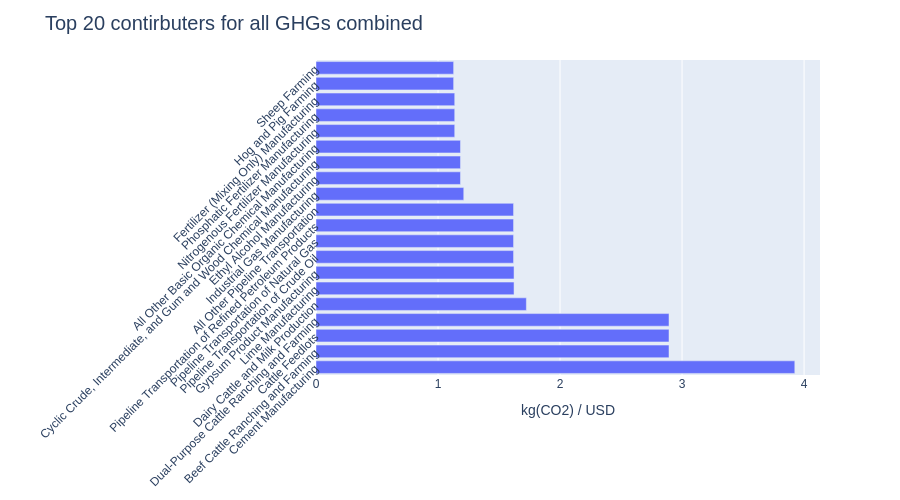

In [9]:
import plotly.express as px
NUM_MEMBERS=20
top10 = df.nlargest(NUM_MEMBERS, EMISSION_WITH_MARGIN)
fig = px.bar(top10, y=NAICS_TITLE, x = EMISSION_WITH_MARGIN)
fig.update_yaxes(tickangle=-45)
fig.update_layout(yaxis_title='', xaxis_title=UNIT, width=FIGURE_WIDTH, 
                  title={'text':f'Top {NUM_MEMBERS} contirbuters for all GHGs combined', 'font':{'size':20}})
fig.write_image("contributers_all_emission.png")
Image(filename="contributers_all_emission.png")


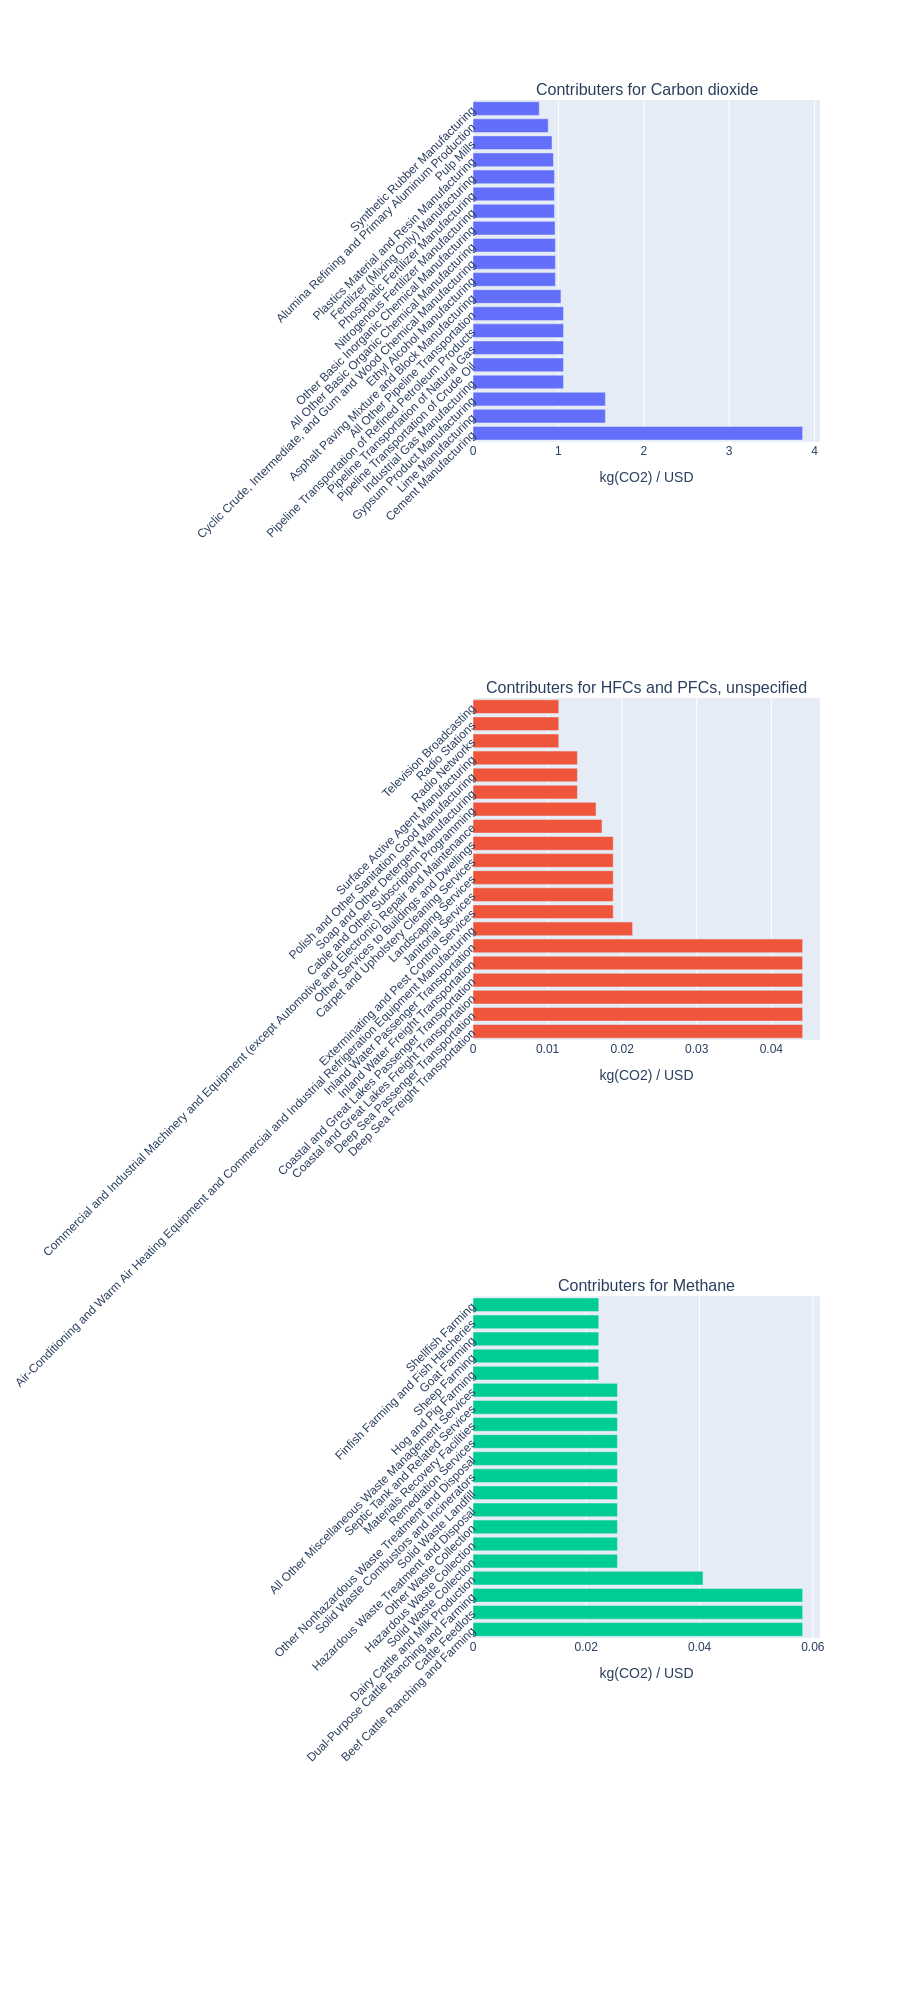

In [10]:
main_ghgs = ['Carbon dioxide', 'HFCs and PFCs, unspecified', 'Methane']
fig = make_subplots(rows=3, cols=1, subplot_titles=[f"Contributers for {col}" for col in main_ghgs])
row = 1
col = 1
for ghg in main_ghgs:
    top_contributers = df_per_ghg[df_per_ghg['GHG'] == ghg].nlargest(NUM_MEMBERS, EMISSION_WITH_MARGIN)
    top_contributers[NAICS_TITLE].apply(lambda x:x.replace(" ","<br>",2))
    fig.add_trace(
    go.Bar( y=top_contributers[NAICS_TITLE], x=top_contributers[EMISSION_WITH_MARGIN], orientation='h' ),
    row=row, col=col
    )
    fig.update_yaxes(row=row, col=col,tickangle=-45)
    fig.update_xaxes(title_text=UNIT, row=row, col=col)
    row += 1
    
fig.update_layout(height=2000, width=FIGURE_WIDTH, title="", showlegend=False)
fig.write_image("contributers_per_emission.png")
Image(filename="contributers_per_emission.png")

## Appendix

### Glossary

|Item| Glossary|
|:---|:--------|
|GHG |Green House Gas|
